<a href="https://colab.research.google.com/github/J-o-y-y/ms_ai_school/blob/main/20230623_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EC%82%B0%EC%A0%90%EB%8F%84_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 인공신경 간단하게 실습 100에포크 마다 산점도 시각화 실습

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [11]:
# 인공신경망 모델 클래스 정의

class SimpleNet(nn.Module) :
  def __init__(self) :

    # 부모 클래스에 메서드 호출 하는 방법
      super(SimpleNet, self).__init__()
      self.fcl = nn.Linear(2,5)
      self.fc2 = nn.Linear(5,1)
      pass

  def forward(self, x) :
      x = torch.relu(self.fcl(x))
      x = torch.sigmoid(self.fc2(x))

      return x

In [ ]:
# 데이터 생성

In [12]:
x = torch.randn(100, 2)
y = ((x[:,0] > 0 & (x[:,1] > 0))).float()
print(x)
print(y)

tensor([[ 7.1496e-01,  6.5736e-01],
        [ 1.0904e+00,  4.7041e-01],
        [-1.0248e+00,  3.9142e-04],
        [-2.8031e-01, -1.7152e+00],
        [-1.2257e+00,  3.2919e-01],
        [ 3.1079e-01,  1.1113e-01],
        [-1.4326e+00, -1.8240e+00],
        [-1.5102e+00, -4.9111e-01],
        [-1.1661e+00,  1.3961e+00],
        [-2.4728e-02,  6.1360e-01],
        [ 9.4934e-01,  4.1161e-01],
        [-9.3892e-01,  4.7817e-02],
        [-1.2676e+00, -1.0107e+00],
        [ 1.0589e-01, -7.8398e-01],
        [ 2.0819e-01,  1.9308e-01],
        [-2.0512e+00,  4.1635e-01],
        [-1.0079e+00, -2.4852e+00],
        [-1.0856e+00, -2.9846e+00],
        [ 5.8410e-01, -4.9101e-01],
        [-2.2189e-01, -2.0899e-01],
        [-9.3492e-01,  1.6864e+00],
        [-1.3934e+00, -1.2715e+00],
        [ 1.5561e+00,  1.9109e+00],
        [ 8.5691e-01, -8.6208e-01],
        [-6.5070e-01, -7.5472e-01],
        [ 2.0617e+00,  3.9743e-01],
        [-1.0967e+00,  2.0000e+00],
        [-7.7885e-01,  1.047

In [ ]:
# 모델 선언

In [16]:
model = SimpleNet()
print(model)

SimpleNet(
  (fcl): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=1, bias=True)
)


In [17]:
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fcl = nn.Linear(2, 5)
        self.fc2 = nn.Linear(5, 1)




In [19]:
# Define the loss function
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [ ]:
# loss 함수와 옵티마이저 정의

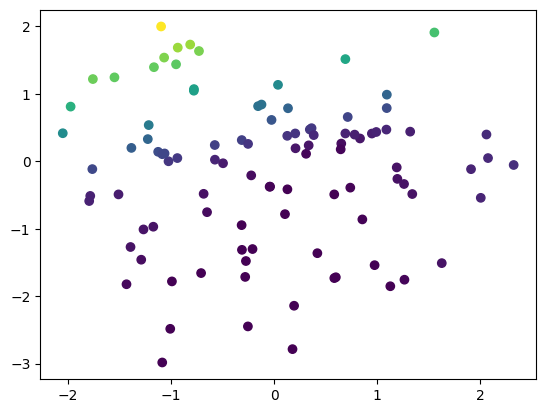

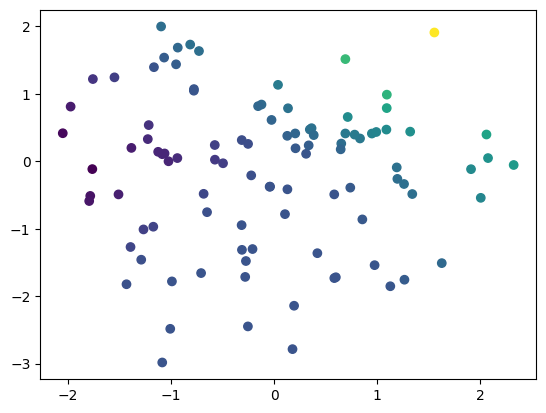

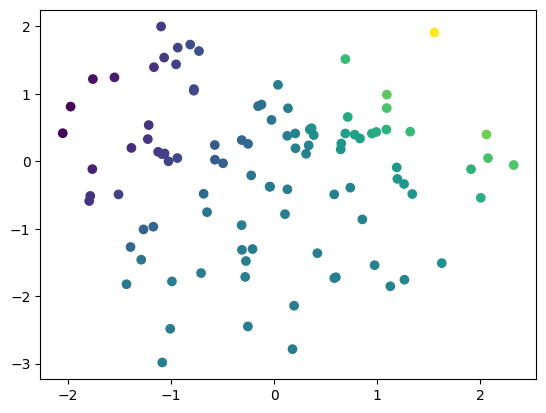

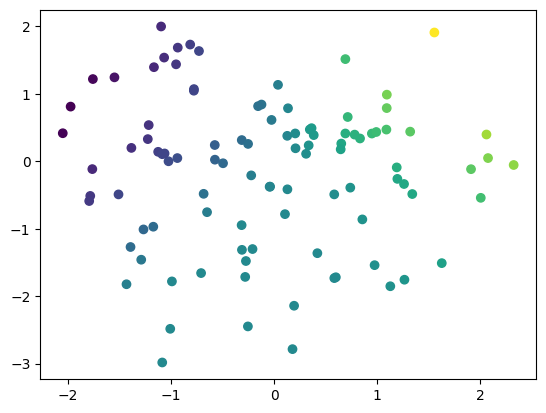

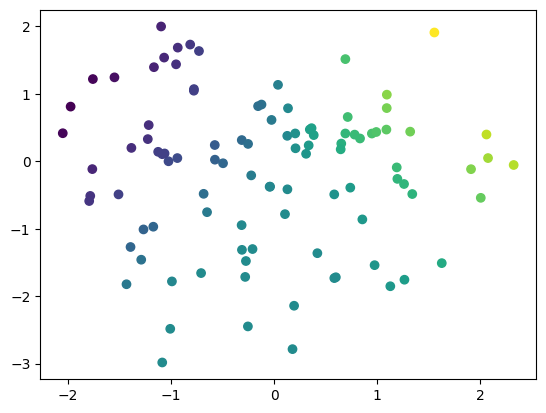

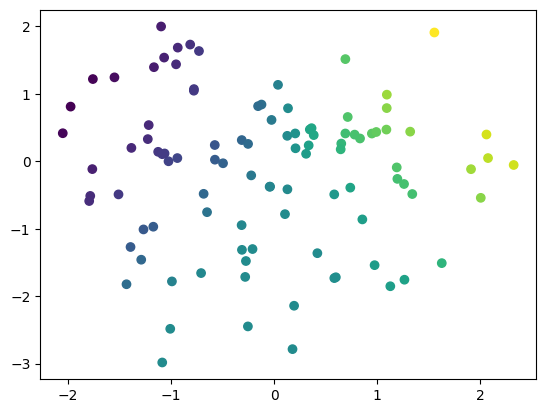

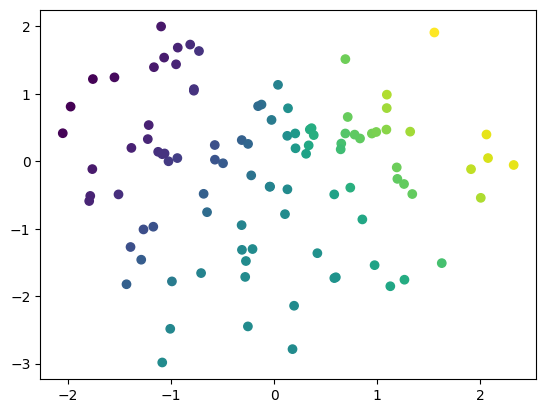

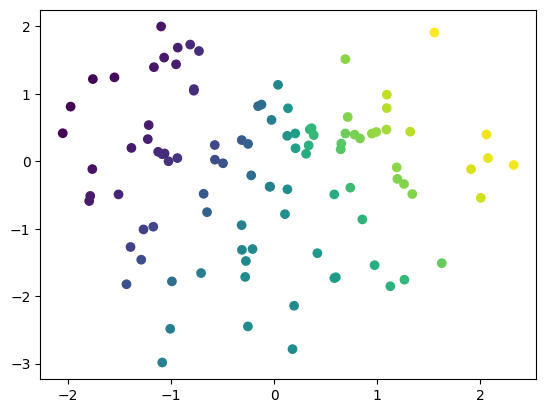

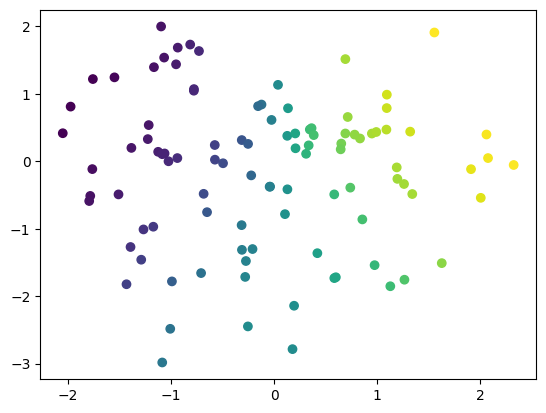

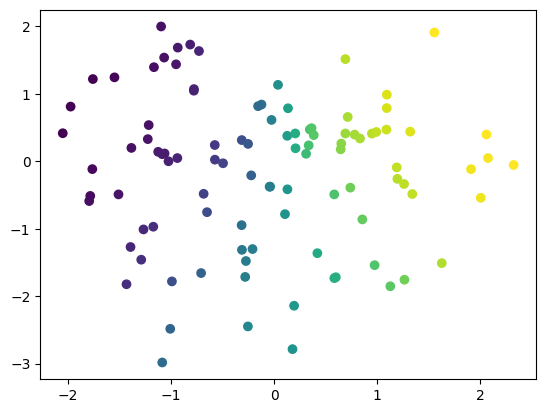

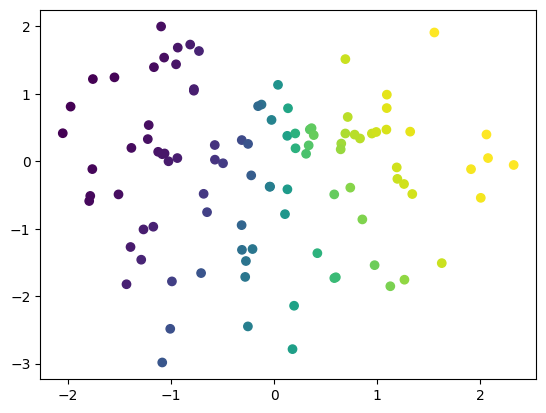

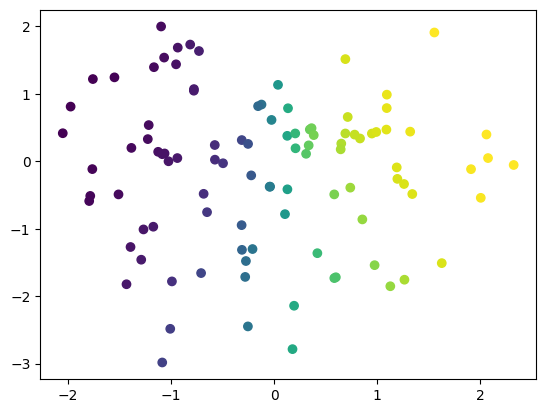

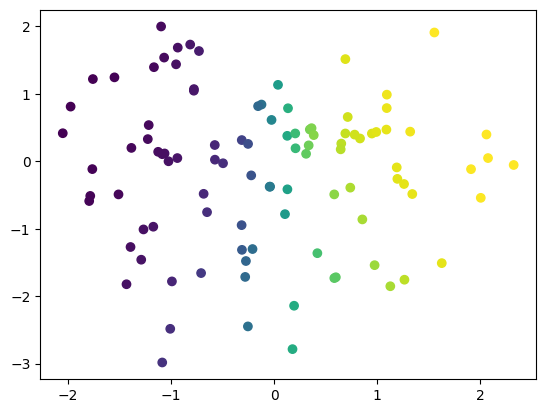

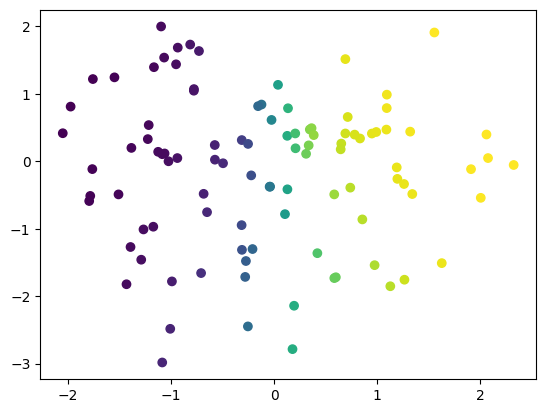

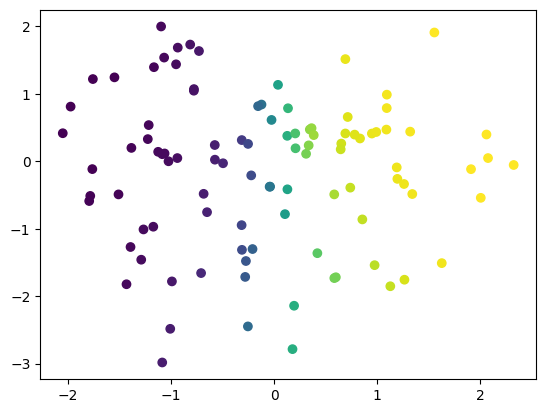

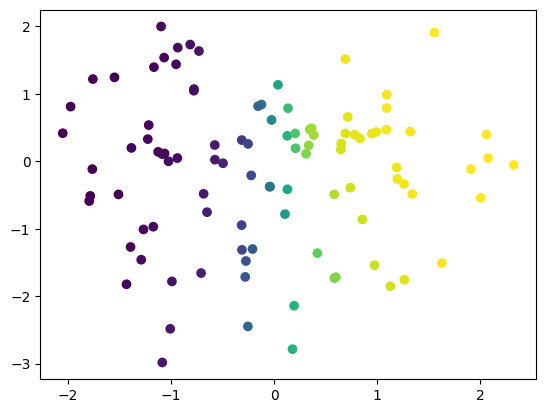

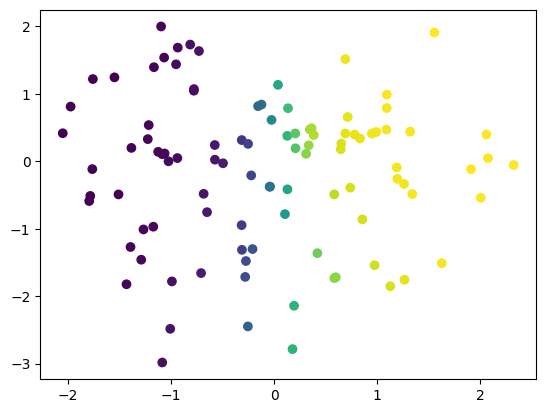

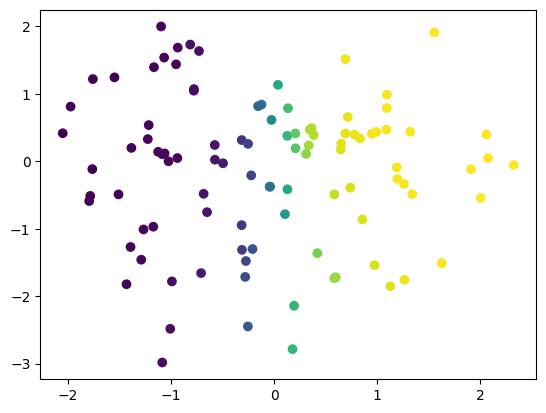

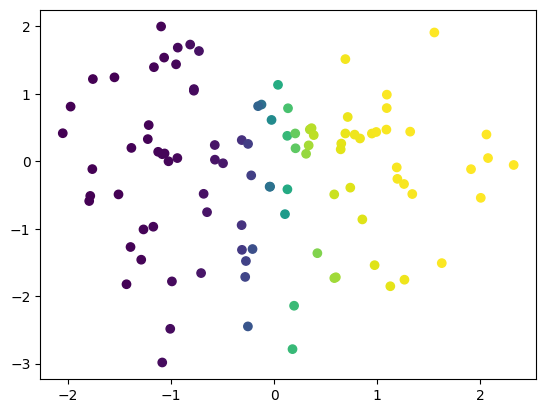

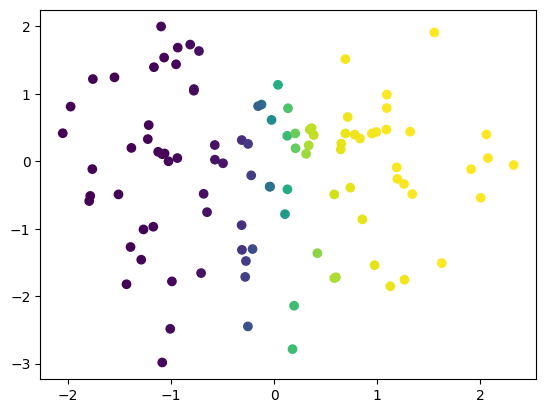

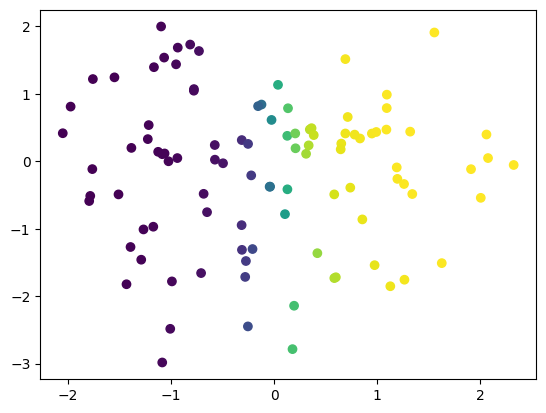

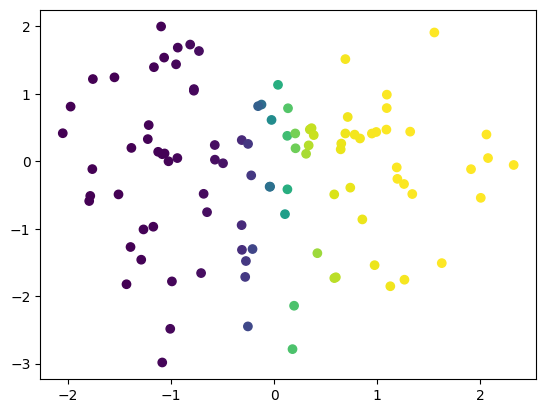

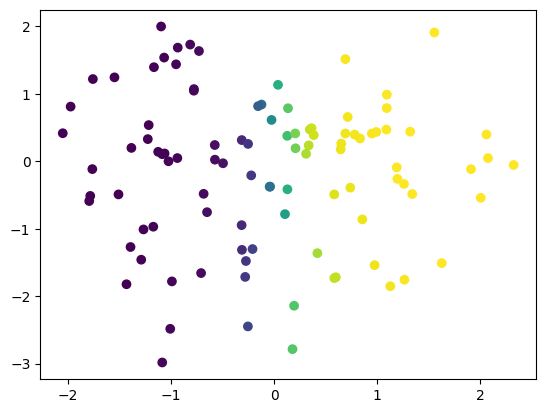

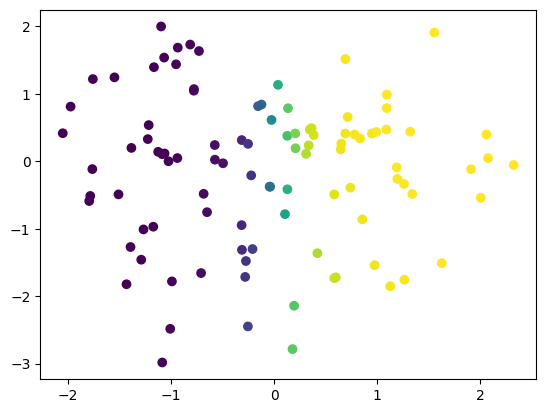

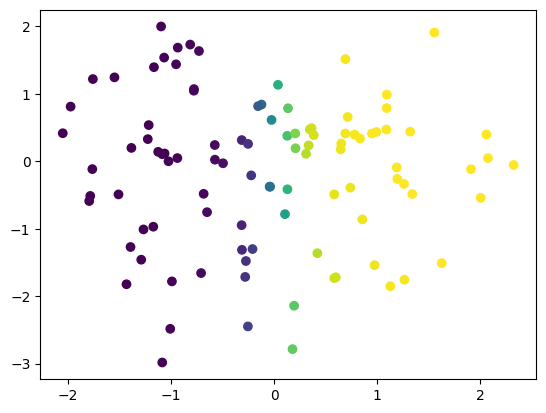

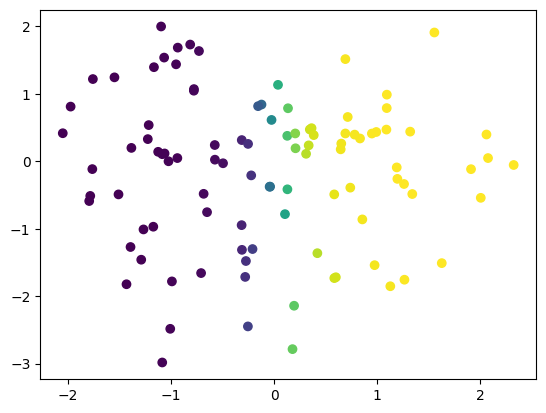

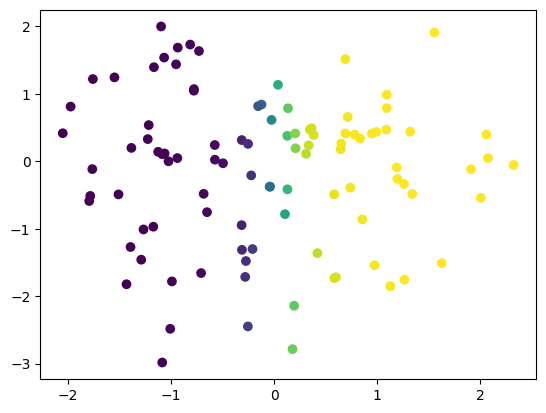

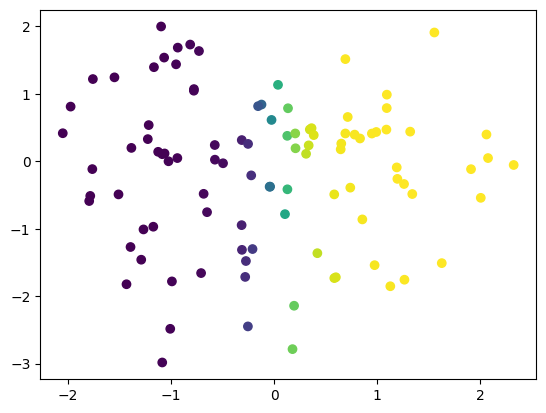

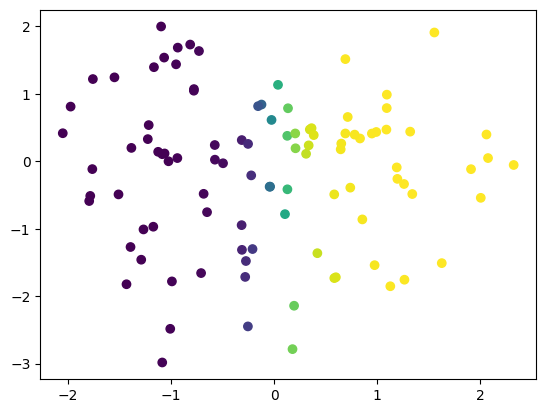

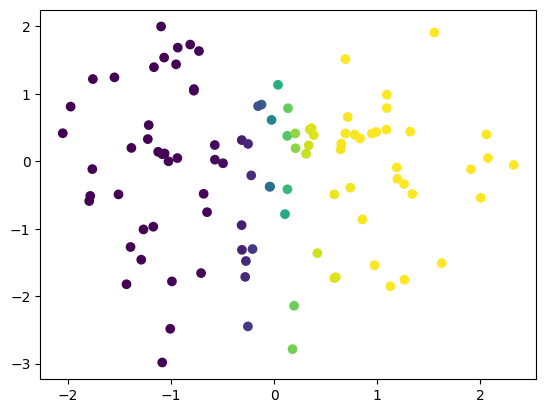

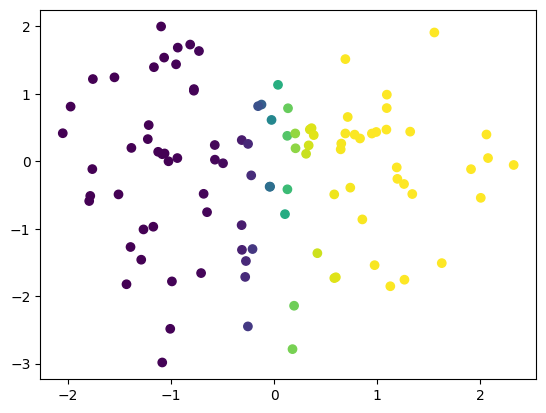

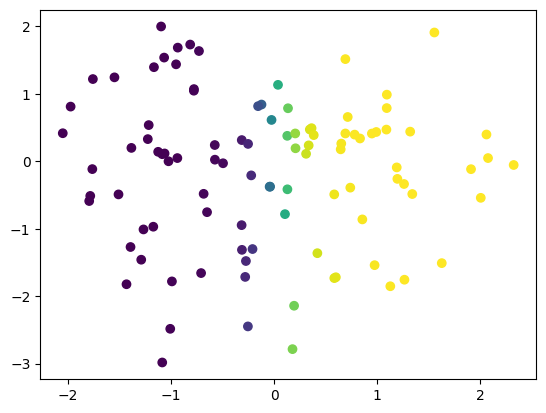

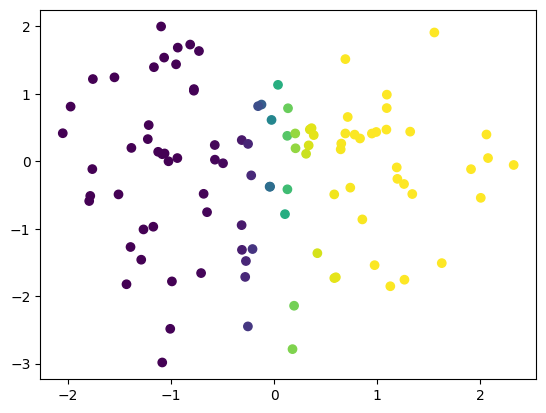

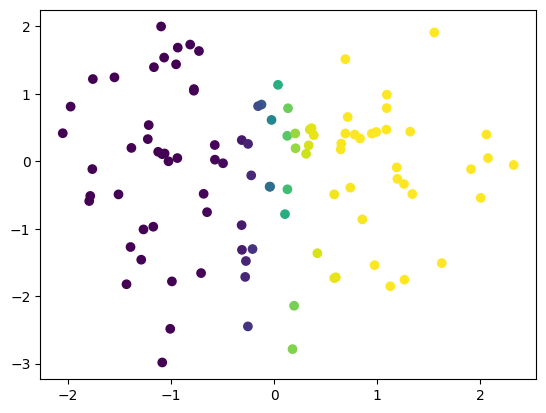

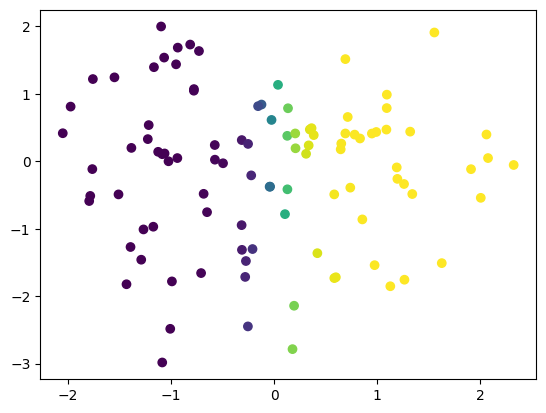

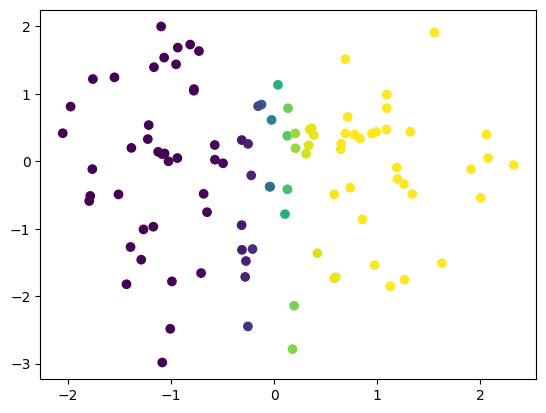

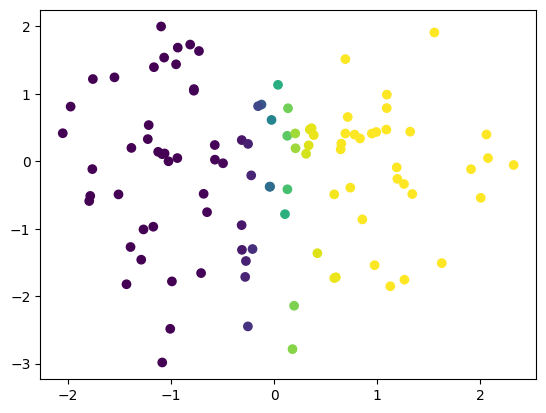

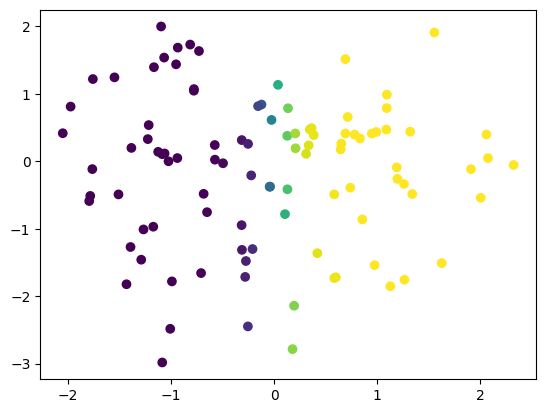

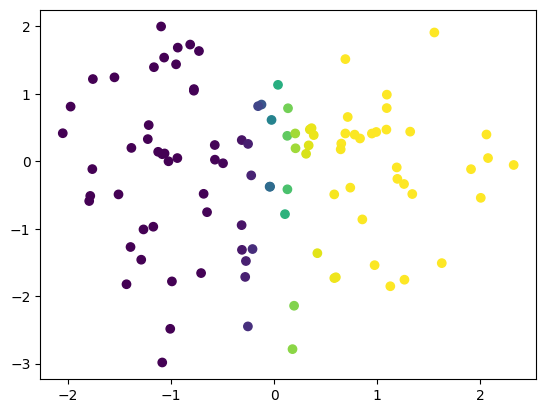

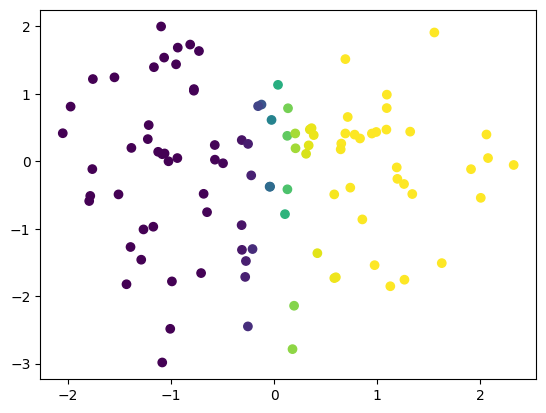

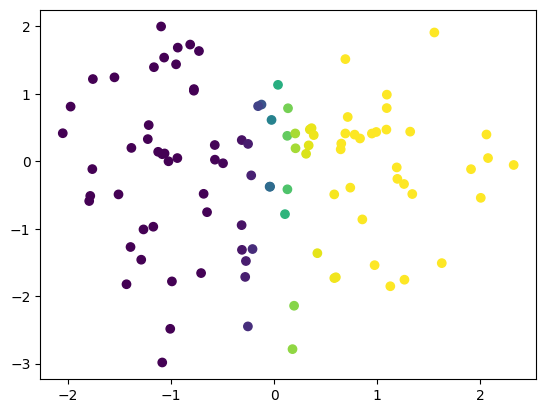

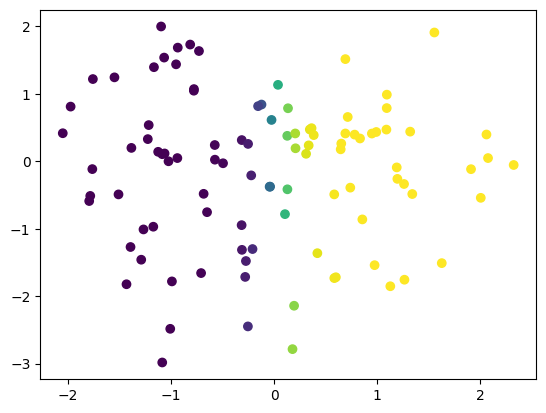

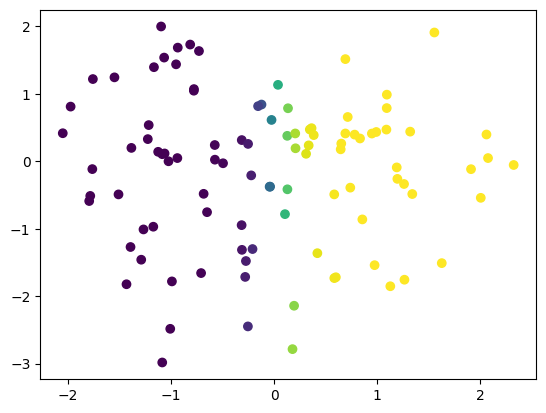

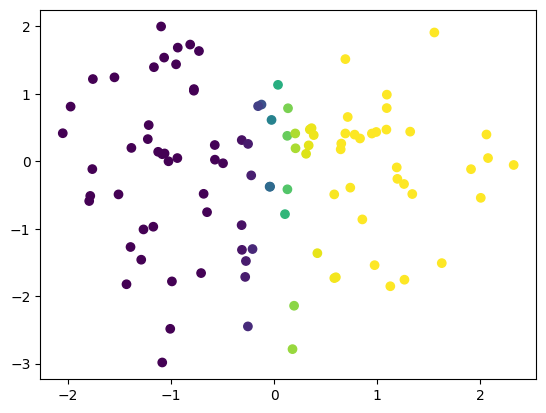

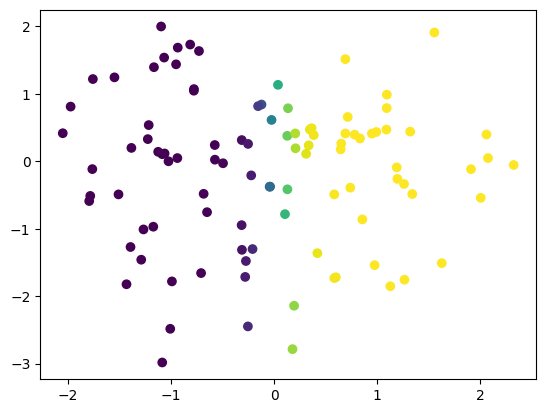

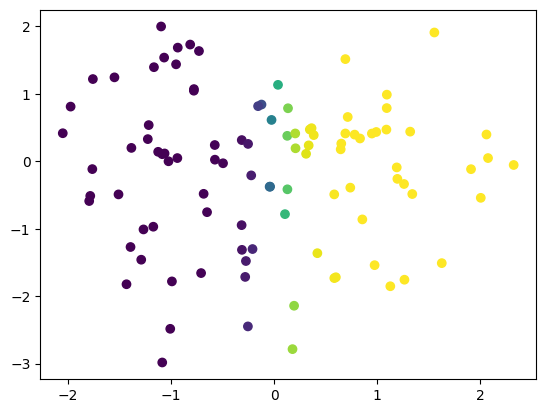

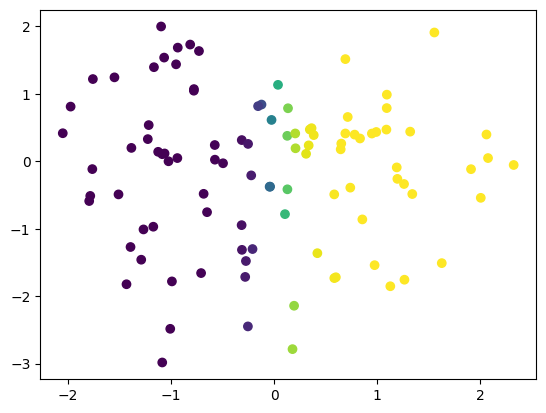

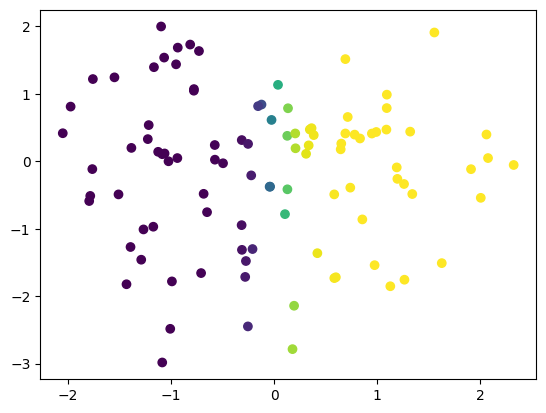

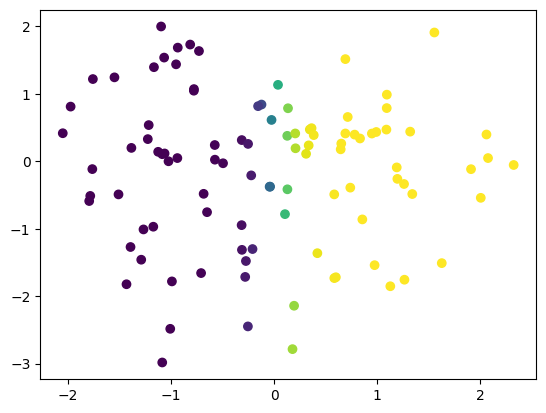

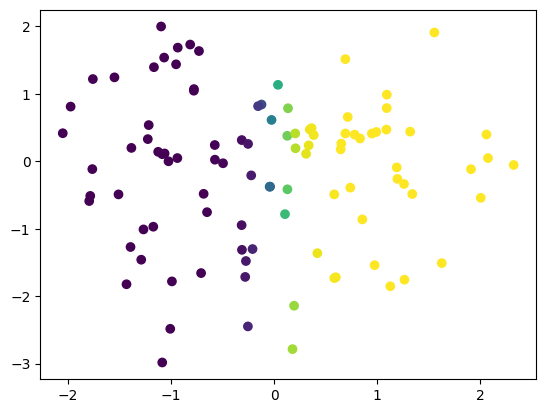

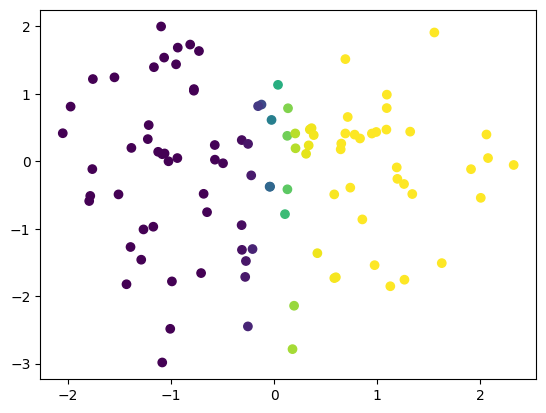

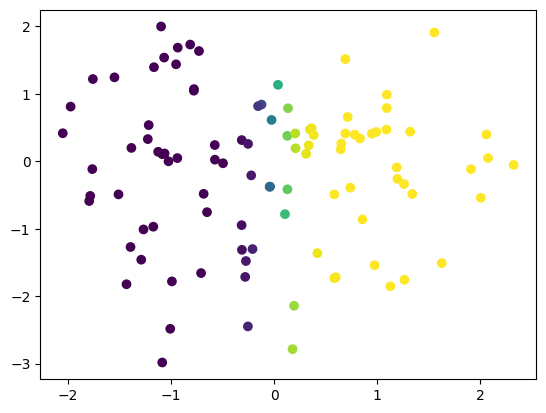

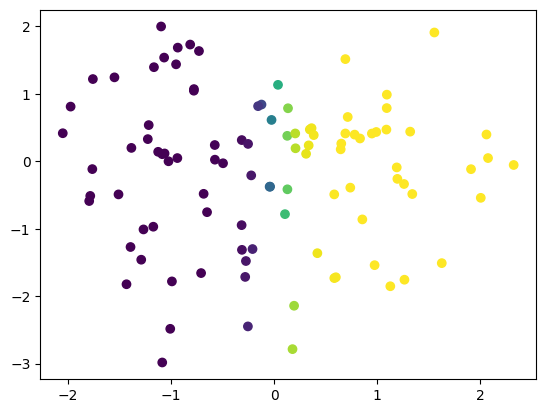

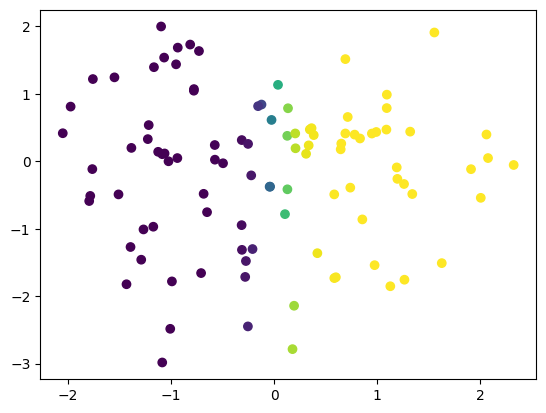

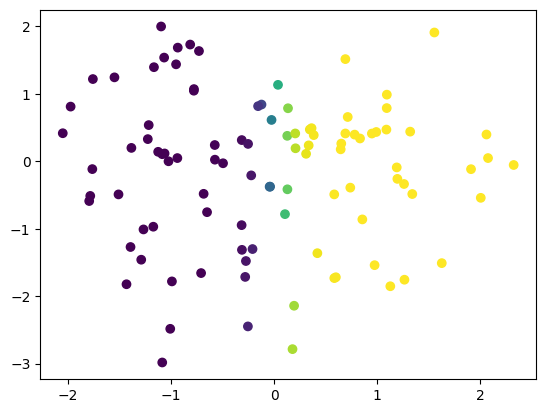

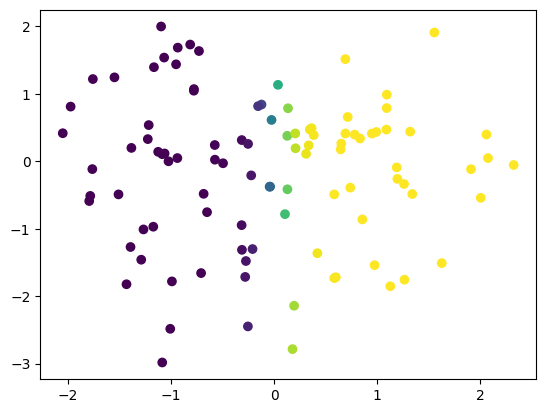

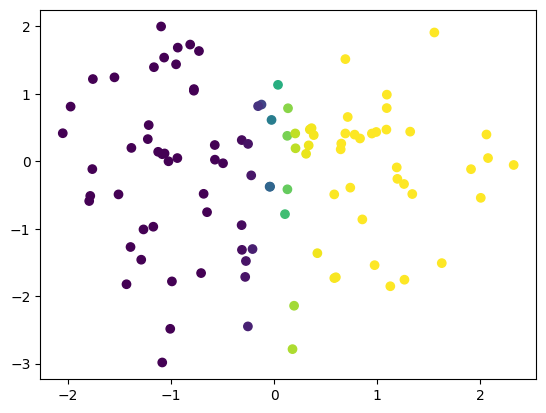

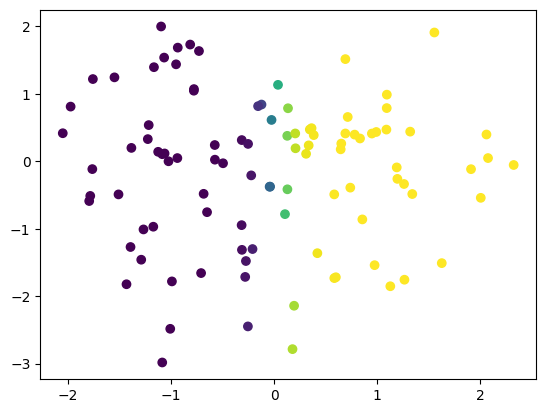

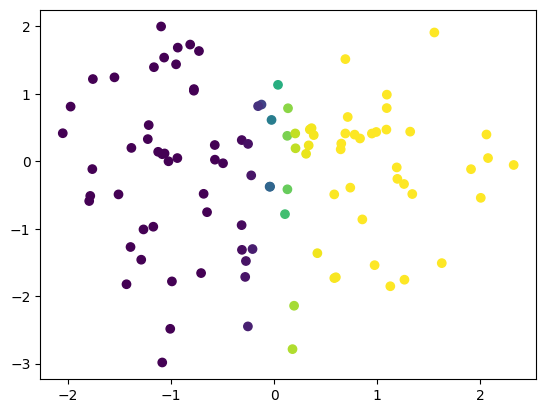

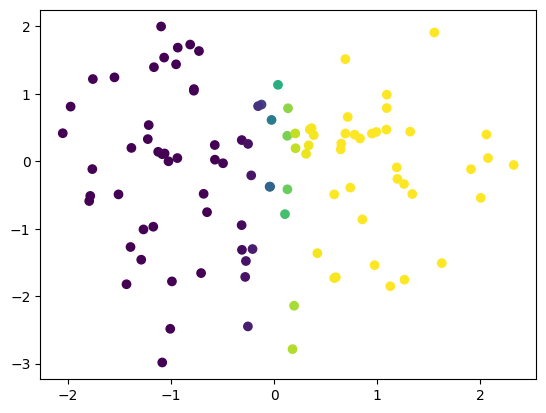

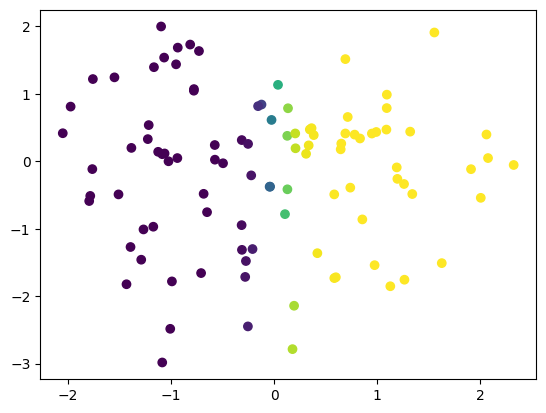

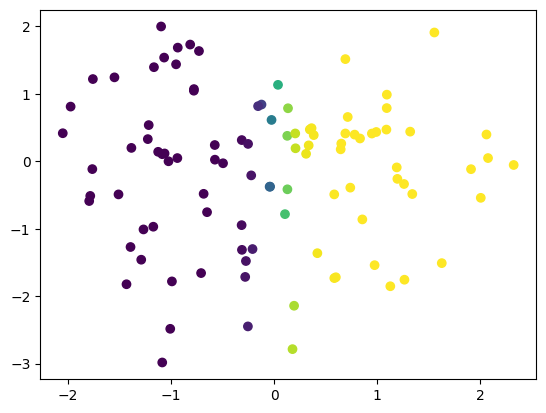

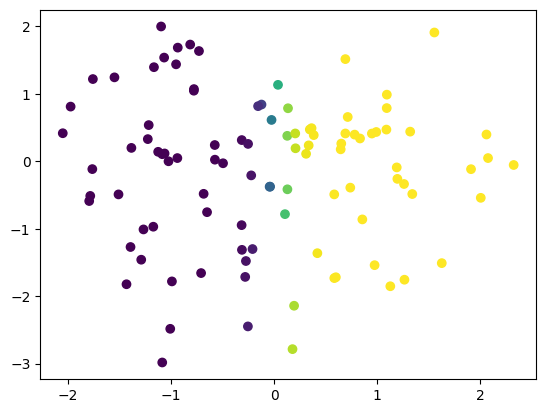

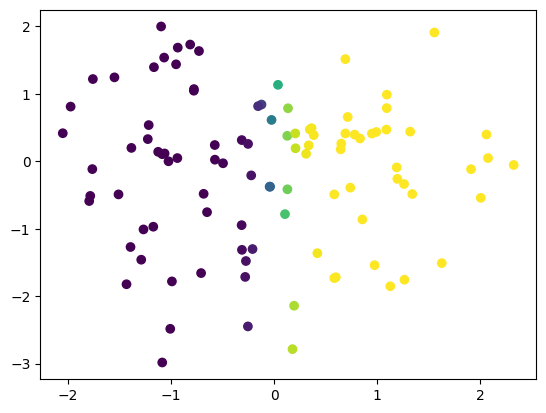

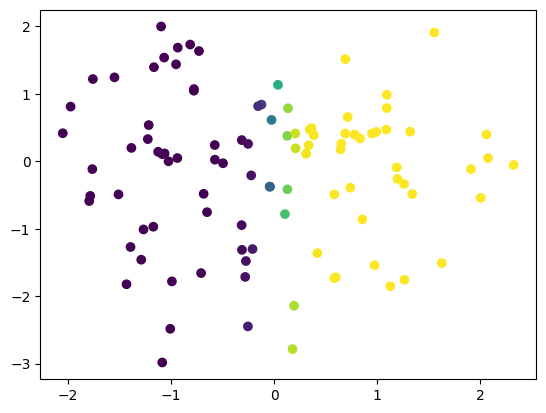

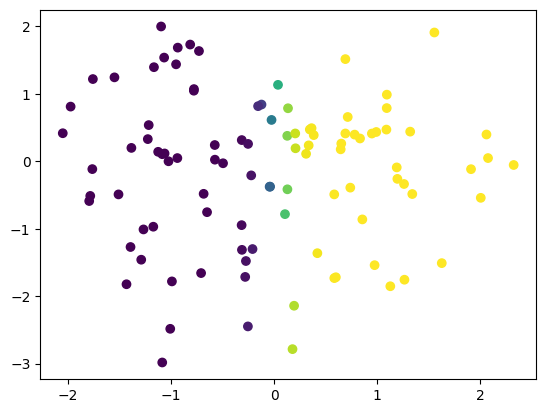

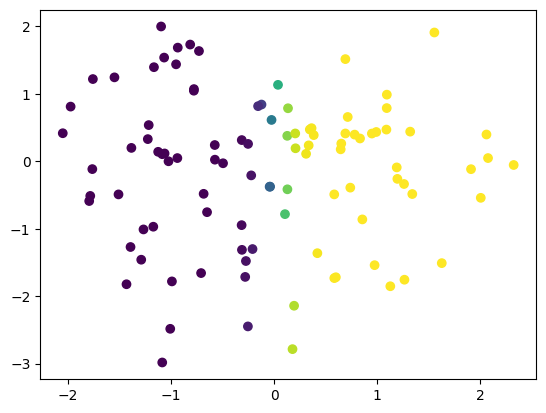

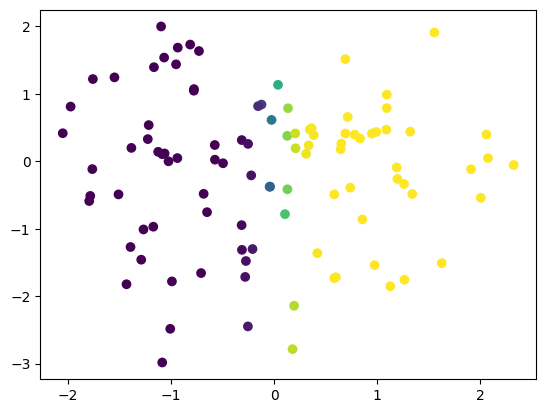

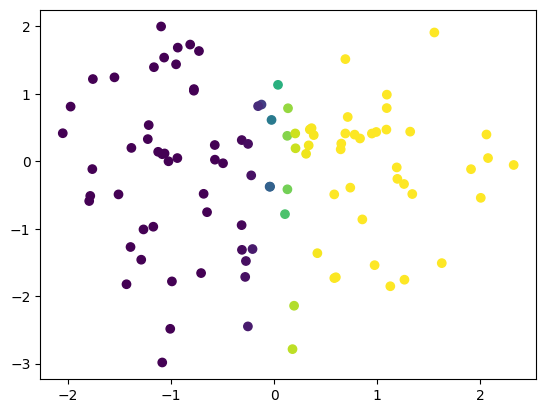

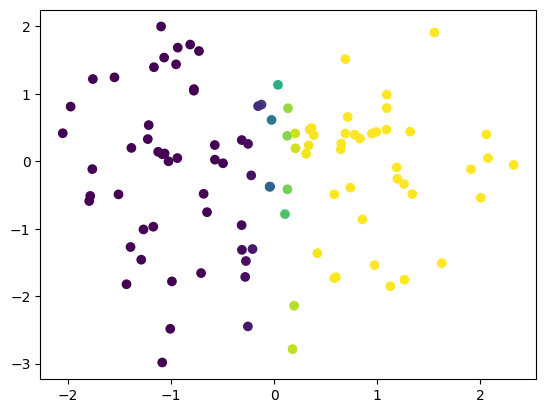

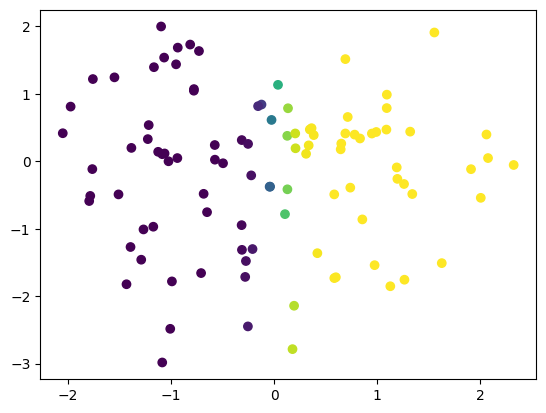

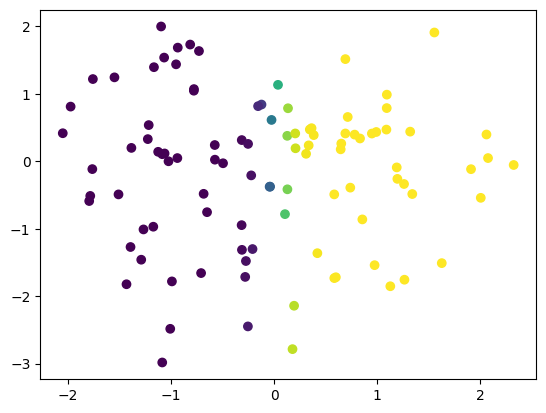

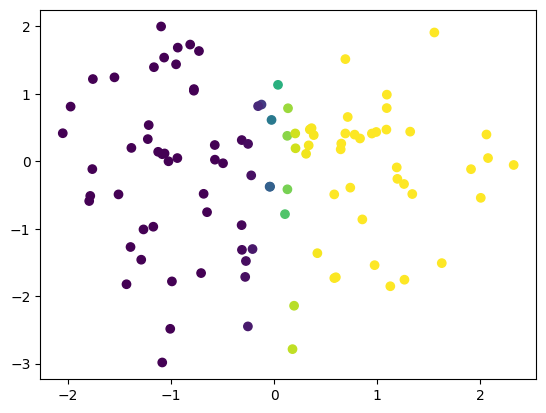

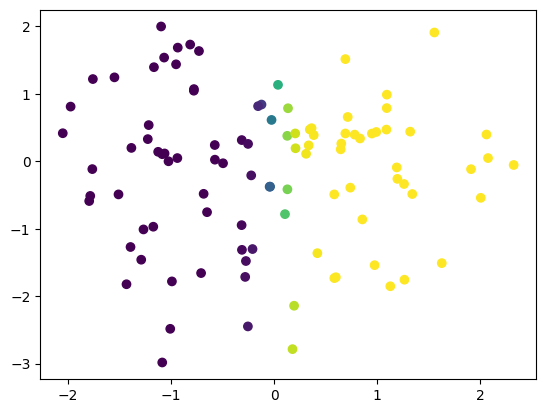

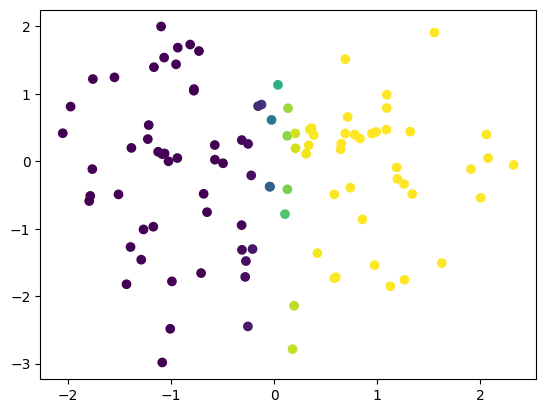

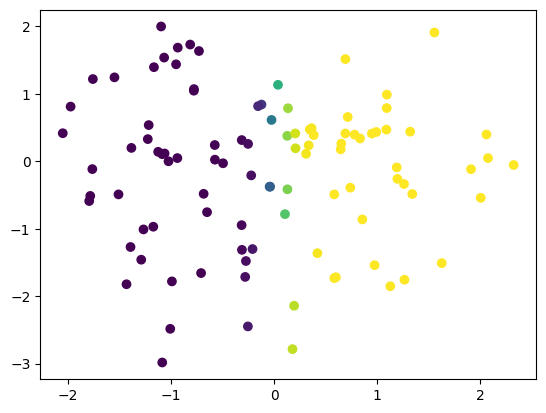

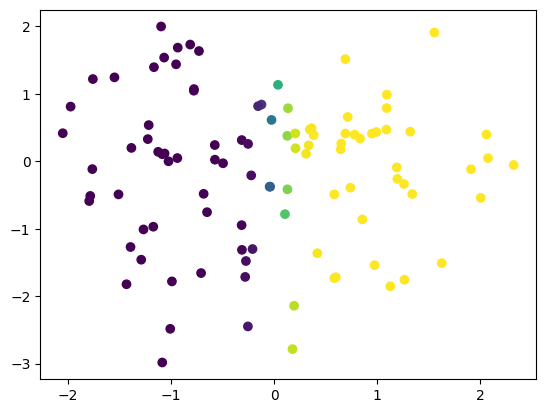

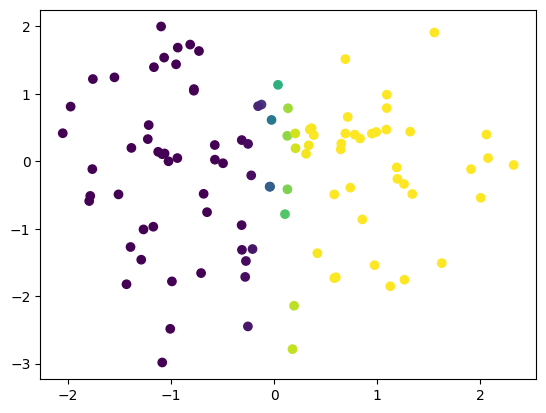

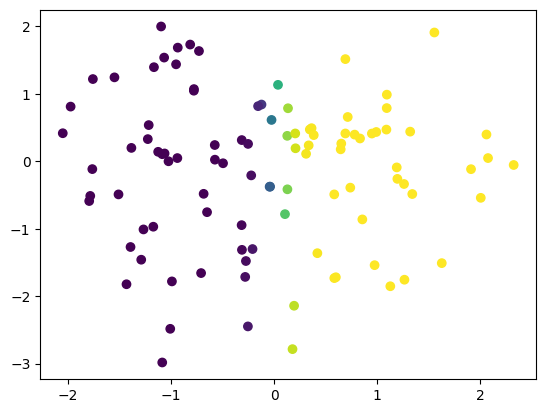

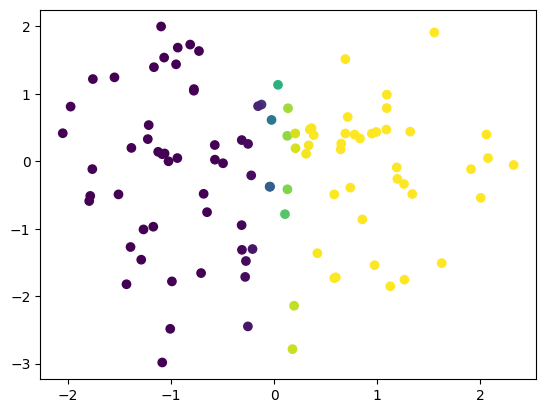

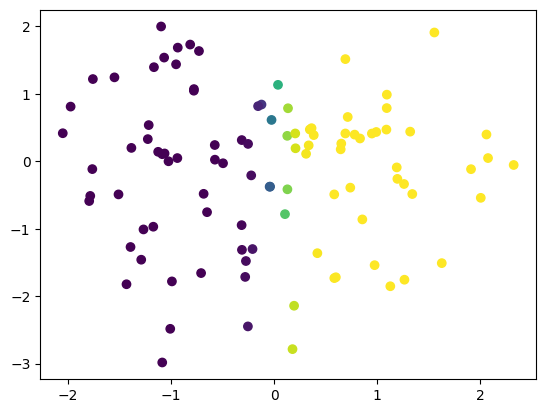

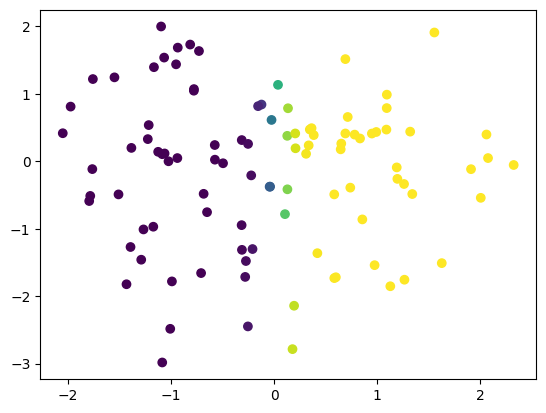

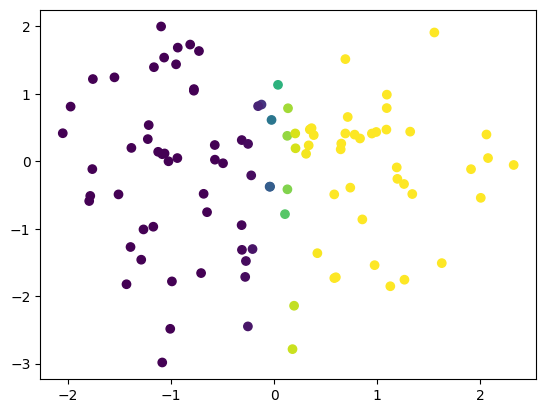

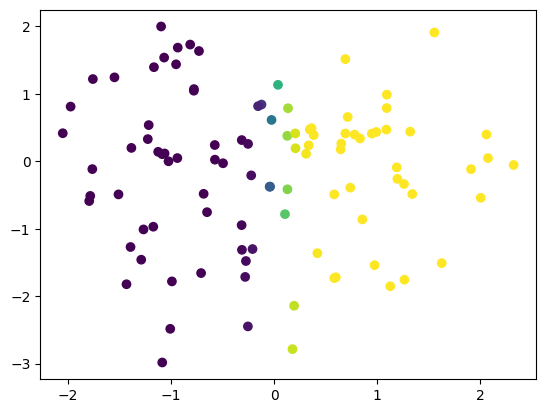

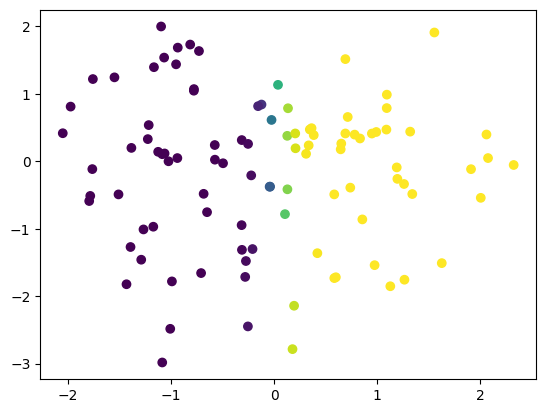

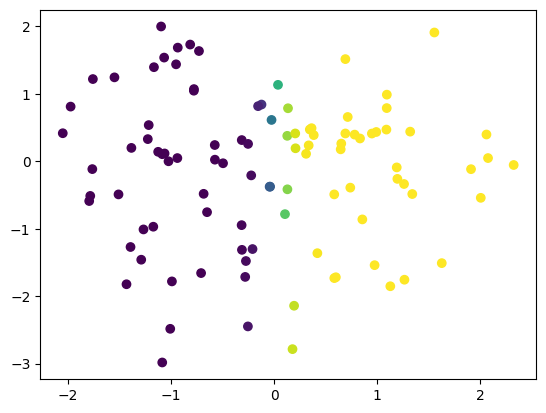

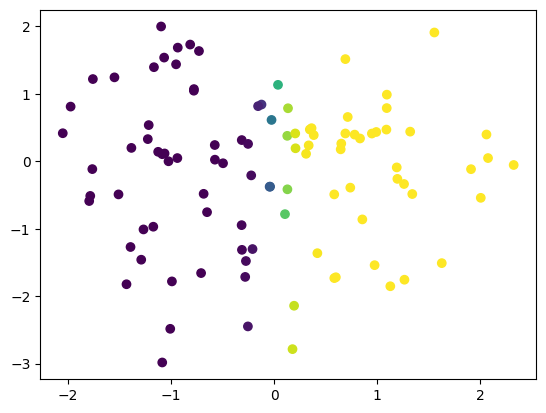

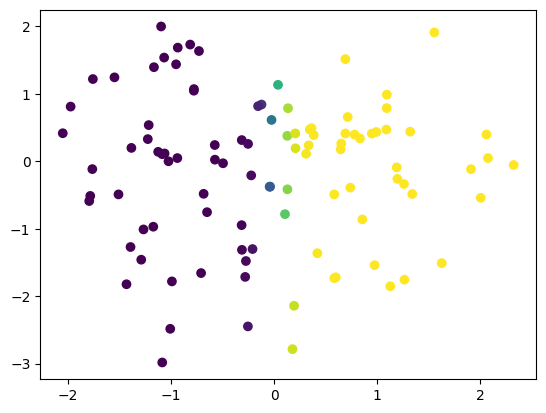

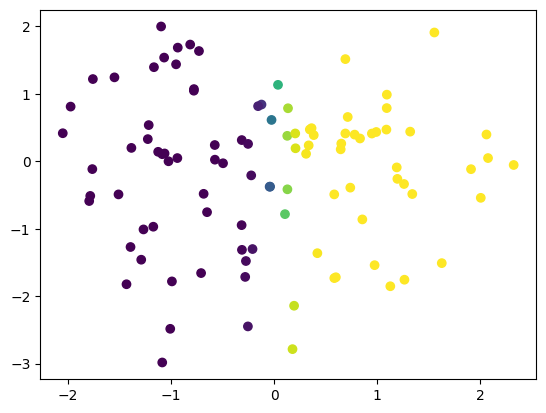

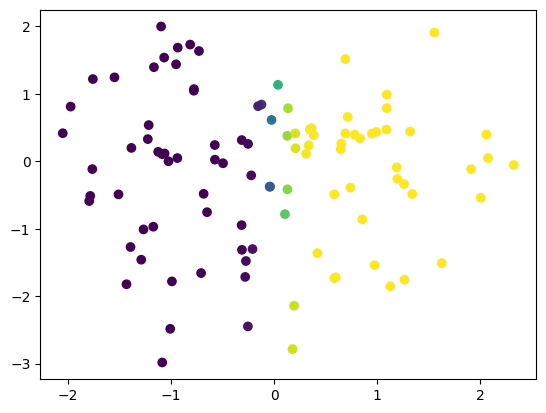

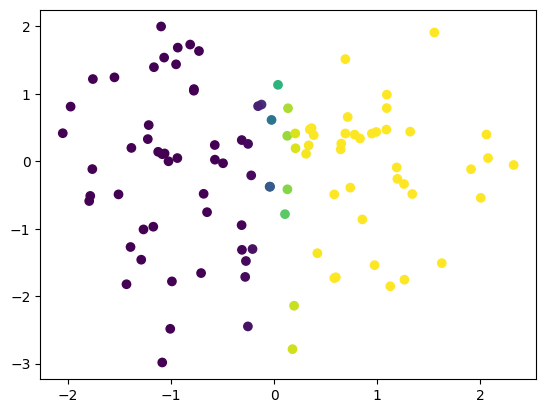

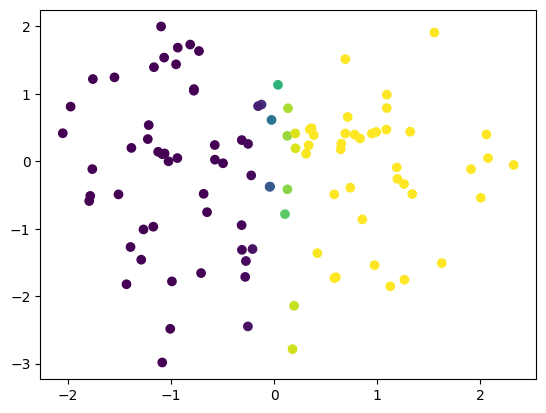

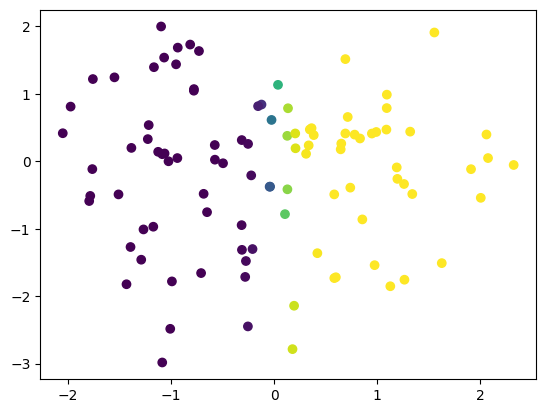

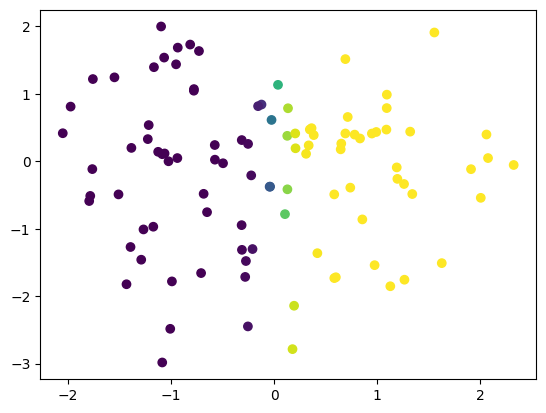

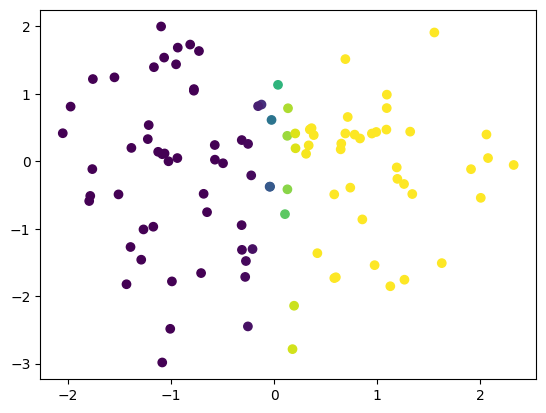

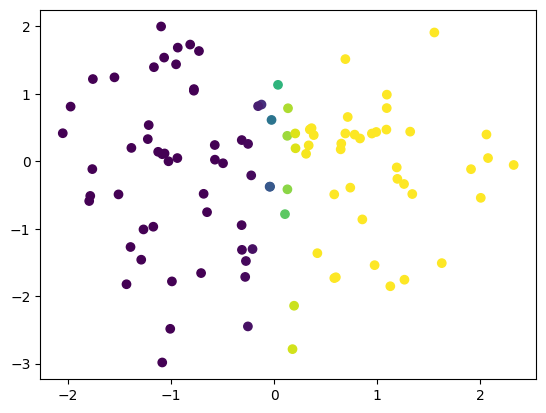

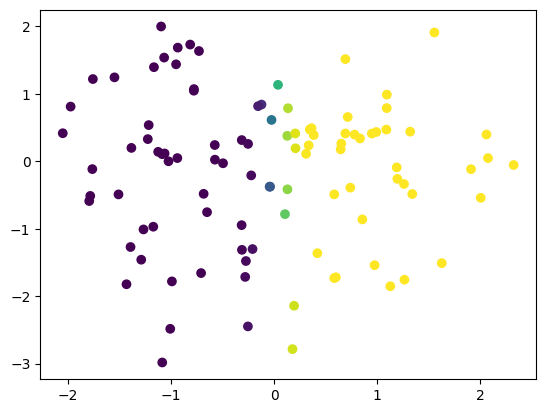

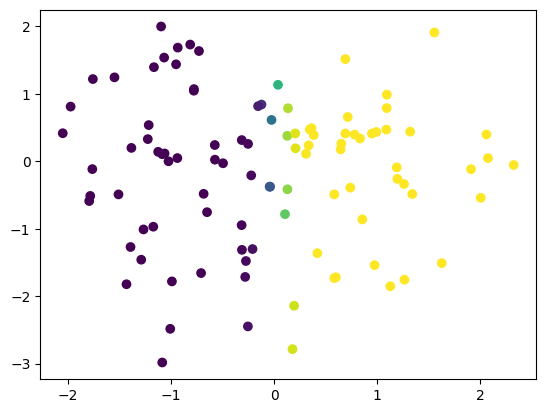

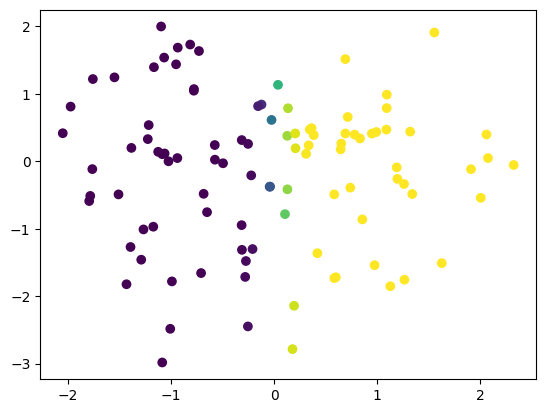

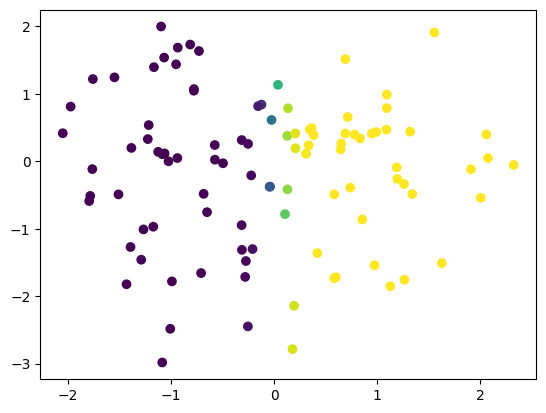

학습완료!


In [20]:

# 학습
for epoch in range(1000):

    # 순전파 단계
    y_pred = model(x)

    # loss
    loss = criterion(y_pred.squeeze(), y)

    # 역전파
    optimizer.zero_grad() # 옵티마이저의 모든 가중치에 대한 변화 0으로 초기화 => 이전 기울 값이 남아있을 가능성이 있어서
    loss.backward() # 손실함수 역전파 수행
    optimizer.step()  # 옵티마이저 가중치 업데이트

    if epoch % 10 == 0:
        plt.clf()
        plt.scatter(x[:, 0], x[:, 1], c=y_pred.detach().numpy().squeeze())
        plt.show()

print("학습완료!")
